In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [7]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [18]:
q = "SELECT MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) FROM facts"
pd.read_sql_query(q,conn)


,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [26]:
q = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
pd.read_sql_query(q,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [27]:
q = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Total world population, and Antartica - pretty much inhabitable.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


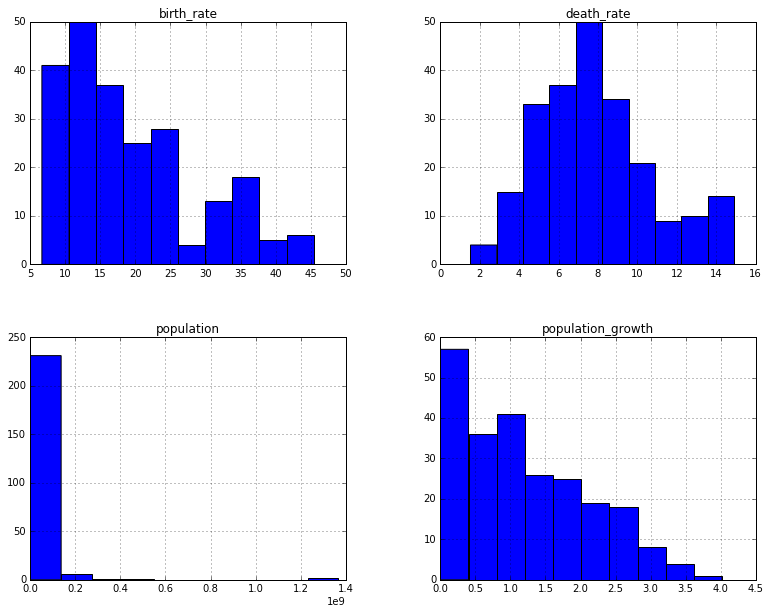

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

q = "SELECT population,population_growth,birth_rate,death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MAX(population) FROM facts)"
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(221)

pd.read_sql_query(q, conn).hist(ax=ax)
plt.show()


In [84]:
q = "SELECT name,population,area_land,CAST(population as FLOAT)/CAST(area as FLOAT) popu_density FROM facts ORDER BY popu_density DESC"
pd.read_sql_query(q, conn)

,name,population,area_land,popu_density
0,Macau,5.927310e+05,28.0,21168.964286
1,Monaco,3.053500e+04,2.0,15267.500000
2,Singapore,5.674472e+06,687.0,8141.279770
3,Hong Kong,7.141106e+06,1073.0,6445.041516
4,Gaza Strip,1.869055e+06,360.0,5191.819444
5,Gibraltar,2.925800e+04,6.0,4876.333333
6,Bahrain,1.346613e+06,760.0,1771.859211
7,Maldives,3.932530e+05,298.0,1319.640940
8,Malta,4.139650e+05,316.0,1310.015823
9,Bermuda,7.019600e+04,54.0,1299.925926
